In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import copy
import torch.nn as nn
import torch.nn.functional as F
import os

from dataload import *
from autoencoder import *

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

## Parameters

In [3]:
batch_size_train = 64
batch_size_test = 64

#train_loader, test_loader = define_mnist_loaders(batch_size_train, batch_size_test)
train_loader, test_loader = define_landscapes_loaders(batch_size_train, batch_size_test, 
                                                      rescale=32, crop=28)

encoding_dim = 128
lr = 0.1
momentum = 0.5
log_interval = 10
n_epochs = 1

Loaded image shape in tensor: torch.Size([32, 1, 28, 28])


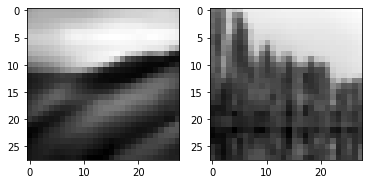

In [4]:
# get minibatch
x = next(iter(train_loader))
x_test = next(iter(test_loader))
if isinstance(x, list): # if MNIST
    x = x[0]; x_test = x_test[0]
print('Loaded image shape in tensor:', x.size())
fig,axes = plt.subplots(1,2); plt.set_cmap(['gray', "viridis"][0]);
img1 = x[0][0].numpy()#.transpose((1, 2, 0))
img2 = x_test[0][0].detach().numpy()#.transpose((1, 2, 0))
axes[0].imshow(img1); # .transpose((1, 2, 0))
axes[1].imshow(img2);

In [5]:
#autoencoder = MNIST_Autoencoder(28*28, encoding_dim)
autoencoder = C_Autoencoder(28*28, encoding_dim)
opt = torch.optim.Adadelta(autoencoder.parameters(), lr=lr)
#autoencoder = Autoencoder(224*224, encoding_dim)

Shape : torch.Size([32, 1, 28, 28])


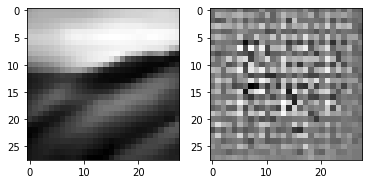

In [6]:
fig,axes = plt.subplots(1,2); plt.set_cmap(['gray','viridis'][0]);
axes[0].imshow(x[0][0].numpy()); 
reconstructed = autoencoder(x)
print(f"Shape : {reconstructed.shape}")
axes[1].imshow(reconstructed[0][0].detach().numpy())

In [7]:
%time train(autoencoder, opt, trainloader=train_loader, valloader=test_loader, num_epochs=1)

Epoch 1/1
----------


100%|█████████████████████████████████████████| 108/108 [14:58<00:00,  8.32s/it]


train loss -2.193949


100%|███████████████████████████████████████████| 27/27 [03:42<00:00,  8.22s/it]

valid loss -4.579649

CPU times: user 18min 42s, sys: 4.33 s, total: 18min 46s
Wall time: 18min 44s


In [8]:
x = next(iter(test_loader))
if isinstance(x, list):
    x = x[0]

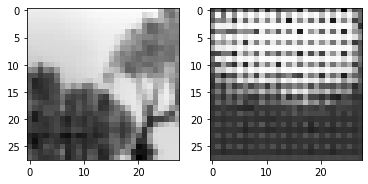

In [11]:
#z = autoencoder(x)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
x = x.to(device)
fig,axes = plt.subplots(1,2); plt.set_cmap(['gray','viridis'][0])
axes[0].imshow(x[0][0].cpu()); axes[1].imshow(autoencoder(x)[0][0].detach().cpu())

In [10]:
ezz

NameError: name 'ezz' is not defined

In [ ]:
model = C_Autoencoder(56*56, encoding_dim).to(device)
model.load_state_dict(torch.load("saved_models/model_c-autoenc56.sav"))

In [ ]:
x = next(iter(test_loader))
if isinstance(x, list):
    x = x[0]
x = x.to(device)
fig,axes = plt.subplots(1,2); plt.set_cmap(['gray','viridis'][0])
axes[0].imshow(x[0][0].cpu()); axes[1].imshow(model(x)[0][0].detach().cpu())